In [42]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("1rec-crime-pfa.csv", parse_dates=["12 months ending"])
df

12 months ending                PFA      Region  \
0           2003-03-31  Avon and Somerset  South West   
1           2003-03-31  Avon and Somerset  South West   
2           2003-03-31  Avon and Somerset  South West   
3           2003-03-31  Avon and Somerset  South West   
4           2003-03-31  Avon and Somerset  South West   
...                ...                ...         ...   
46464       2018-12-31          Wiltshire  South West   
46465       2018-12-31          Wiltshire  South West   
46466       2018-12-31          Wiltshire  South West   
46467       2018-12-31          Wiltshire  South West   
46468       2018-12-31          Wiltshire  South West   

                                                 Offence  \
0                               All other theft offences   
1                                          Bicycle theft   
2                              Criminal damage and arson   
3      Death or serious injury caused by illegal driving   
4                                      Domestic burglary   
...                                                  ...   
46464                            Stalking and harassment   
46465                              Theft from the person   
46466                                   Vehicle offences   
46467                               Violence with injury   
46468                            Violence without injury   

       Rolling year total number of offences  
0                                      25959  
1                                       3090  
2                                      26202  
3                                          2  
4                                      14561  
...                                      ...  
46464                                   2380  
46465                                    347  
46466                                   2895  
46467                                   5701  
46468                                   5840  

[46469 rows x 5 columns]

In [43]:
dfch = pd.read_excel("population.xlsx", parse_dates=["12 months ending"])
df_new = pd.merge(df, dfch, on=("Region", "12 months ending"))
df_new["number of offences per 1000 people"] = df_new["Rolling year total number of offences"]/df_new["Population"] * 1000
df_new


12 months ending                PFA         Region  \
0           2003-03-31  Avon and Somerset     South West   
1           2003-03-31  Avon and Somerset     South West   
2           2003-03-31  Avon and Somerset     South West   
3           2003-03-31  Avon and Somerset     South West   
4           2003-03-31  Avon and Somerset     South West   
...                ...                ...            ...   
44414       2018-12-31      West Midlands  West Midlands   
44415       2018-12-31      West Midlands  West Midlands   
44416       2018-12-31      West Midlands  West Midlands   
44417       2018-12-31      West Midlands  West Midlands   
44418       2018-12-31      West Midlands  West Midlands   

                                                 Offence  \
0                               All other theft offences   
1                                          Bicycle theft   
2                              Criminal damage and arson   
3      Death or serious injury caused by illegal driving   
4                                      Domestic burglary   
...                                                  ...   
44414                            Stalking and harassment   
44415                              Theft from the person   
44416                                   Vehicle offences   
44417                               Violence with injury   
44418                            Violence without injury   

       Rolling year total number of offences  Population  \
0                                      25959   4991000.0   
1                                       3090   4991000.0   
2                                      26202   4991000.0   
3                                          2   4991000.0   
4                                      14561   4991000.0   
...                                      ...         ...   
44414                                  15002   5873003.0   
44415                                   3230   5873003.0   
44416                                  37250   5873003.0   
44417                                  30561   5873003.0   
44418                                  24861   5873003.0   

       number of offences per 1000 people  
0                                5.201162  
1                                0.619114  
2                                5.249850  
3                                0.000401  
4                                2.917451  
...                                   ...  
44414                            2.554400  
44415                            0.549974  
44416                            6.342581  
44417                            5.203641  
44418                            4.233098  

[44419 rows x 7 columns]

1 Гипотеза: Удаление данных организаций не сильно отразится на общую картину распределения преступлений. 
Сначала покажем общее распределение преступлений с течением времени до обработки.

In [44]:
time_offence = df.groupby("12 months ending").sum()["Rolling year total number of offences"]
fig_time_offence = px.line(time_offence, y="Rolling year total number of offences")
fig_time_offence.show()

После удаления неудобных данных распределение приняло следующий вид:

In [45]:
time_offence_new = df_new.groupby("12 months ending").sum()["Rolling year total number of offences"]
fig_time_offence_new = px.line(time_offence_new, y="Rolling year total number of offences")
fig_time_offence_new.show()

По всей видимости, мы нашли объяснение двойному минимуму распределения преступлений. Он появлялся только из-за внезапного появления в середине 2011 года новых строк с данными от частных организаций. Однако возрастание преступности, начиная с 2014 года никуда не делся. В целом можно заключить, что гипотеза почти подтвердилась.

2 Гипотеза: Нормировка преступлений гораздо точнее покажет опасность отдельных районов. Сначала покажем общее распределение преступлений по регионам до обработки.

In [46]:
Region_offence = df_new.groupby("Region").sum()["Rolling year total number of offences"].sort_values()
fig_Region_offence = px.bar(Region_offence, y='Rolling year total number of offences')
fig_Region_offence.show()

Теперь покажем распределение преступлений с учётом количества жителей в регионах.

In [47]:
Region_offence_new = df_new.groupby("Region").sum()["number of offences per 1000 people"].sort_values()
fig_Region_offence_new = px.bar(Region_offence_new, y='number of offences per 1000 people')
fig_Region_offence_new.show()

Хоть Лондон и оставил за собой криминальное лидерство, можно заметить существенные изменения в распределении преступлений. Так Северо-Восточный округ с последнего 10 места переместился аж на 4, а Юго-Восточный со 2 на 8 место. Но, что самое главное, теперь распределение приблизилось к равномерному, то есть на самом деле в стране нет такого сильного криминогенного перекоса. Гипотеза полностью подтвердилась.

3 Гипотеза: В зоне ответственности столичной полиции криминальная обстановка не настолько сильно отличается относительно других районов, если сделать поправку на количество жителей, которое они обхватывают. Покажем, какое распределение мы видели во 2 задании.

In [48]:
PFA_offence = df_new.groupby("PFA").sum()["Rolling year total number of offences"].sort_values()
fig_PFA_offence = px.bar(PFA_offence, y='Rolling year total number of offences')
fig_PFA_offence.show()

С поправкой на население распределение принимает следующий вид:

In [49]:
PFA_offence_new = df_new.groupby("PFA").sum()["number of offences per 1000 people"].sort_values()
fig_PFA_offence_new = px.bar(PFA_offence_new, y='number of offences per 1000 people')
fig_PFA_offence_new.show()

Видим, что некоторые районы сместились, например Northumbria с 15 места поднялась на 3. Но общая картина распределения практически не изменилась и столичная полиция лидирует с большим отрывом. Следовательно гипотеза не подтвердилась.

Гипотеза 4. У разных полицейских участков сильно отличается количество подкотрольных им регионов. Так как полицейских участков намного больше, чем регионов, корректнее было бы сформулировать гипотезу наоборот: в разных регионах количество полицейских отделов сильно разнится.

In [50]:
for i in df_new.Region.unique():
  print(i, 
        df_new["PFA"].loc[df_new["Region"] == i].unique())

South West ['Avon and Somerset' 'Devon and Cornwall' 'Dorset' 'Gloucestershire'
 'Wiltshire']
East ['Bedfordshire' 'Cambridgeshire' 'Essex' 'Hertfordshire' 'Norfolk'
 'Suffolk']
North West ['Cheshire' 'Cumbria' 'Greater Manchester' 'Lancashire' 'Merseyside']
London ['City of London' 'Metropolitan Police']
North East ['Cleveland' 'Durham' 'Northumbria']
East Midlands ['Derbyshire' 'Leicestershire' 'Lincolnshire' 'Northamptonshire'
 'Nottinghamshire']
Wales ['Dyfed-Powys' 'Gwent' 'North Wales' 'South Wales']
South East ['Hampshire' 'Kent' 'Surrey' 'Sussex' 'Thames Valley']
Yorkshire and The Humber ['Humberside' 'North Yorkshire' 'South Yorkshire' 'West Yorkshire']
West Midlands ['Staffordshire' 'Warwickshire' 'West Mercia' 'West Midlands']


In [51]:
import seaborn as sns

In [52]:
df_ = df_new.drop_duplicates(subset=["PFA"], keep="first")

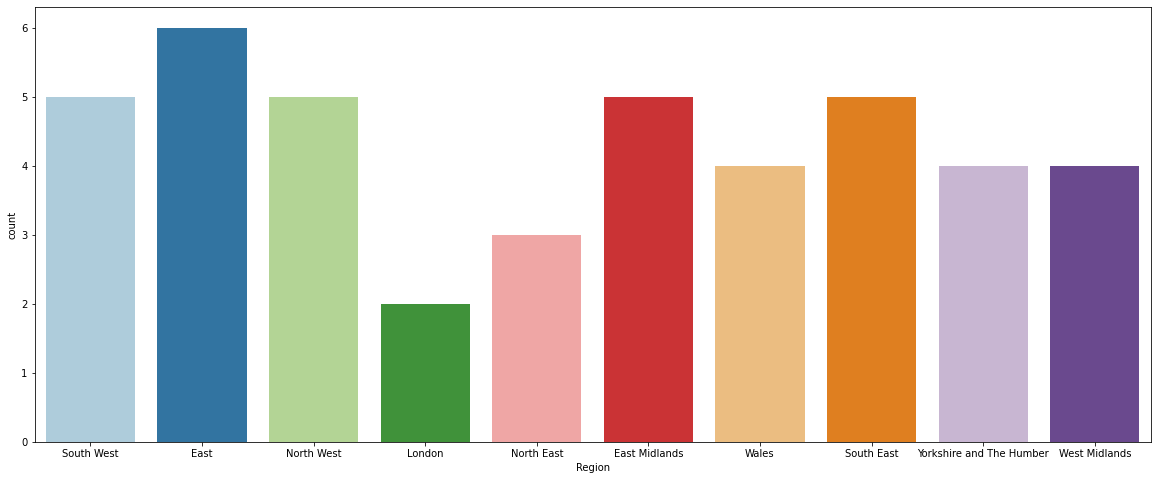

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(x="Region", data=df_, palette="Paired");

In [54]:
PFA_data = [{name: df_new["PFA"].to_list().count(name) for name in df_new["Region"].unique()}
                 for i in df_new.Region.unique()
                 if df_new["Region"] == i]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Можно, конечно, отобразить, как было изначально сформулировано, но так менее наглядно. Зато отчётливо видно, что ни один полицейский участок не дежурит сразу в нескольких регионах страны.

In [55]:
for i in df_new.PFA.unique():
  print(i, 
        df_new["Region"].loc[df_new["PFA"] == i].unique())

Avon and Somerset ['South West']
Devon and Cornwall ['South West']
Dorset ['South West']
Gloucestershire ['South West']
Wiltshire ['South West']
Bedfordshire ['East']
Cambridgeshire ['East']
Essex ['East']
Hertfordshire ['East']
Norfolk ['East']
Suffolk ['East']
Cheshire ['North West']
Cumbria ['North West']
Greater Manchester ['North West']
Lancashire ['North West']
Merseyside ['North West']
City of London ['London']
Metropolitan Police ['London']
Cleveland ['North East']
Durham ['North East']
Northumbria ['North East']
Derbyshire ['East Midlands']
Leicestershire ['East Midlands']
Lincolnshire ['East Midlands']
Northamptonshire ['East Midlands']
Nottinghamshire ['East Midlands']
Dyfed-Powys ['Wales']
Gwent ['Wales']
North Wales ['Wales']
South Wales ['Wales']
Hampshire ['South East']
Kent ['South East']
Surrey ['South East']
Sussex ['South East']
Thames Valley ['South East']
Humberside ['Yorkshire and The Humber']
North Yorkshire ['Yorkshire and The Humber']
South Yorkshire ['Yorkshir

Видим, что количество полицейских отделов разнится от 2 в Лондоне до 6 в Восточном округе. Из этой картины мы понимаем, почему на графике преступлений по районам столичная полиция имеет такой выброс. Там всего 2 участка, 1 из которых вообще почти не имеет (или не выкладывает) преступлений. Получается всего один участок на самый крупный регион страны. Можно заключить, что гипотеза скорее подтвердилась.

5 Гипотеза: возможно, уровень преступности как-то коррелирует с широтами, в которых находится регион, например, чем южнее, тем больше в среднем совершается в год преступлений.

In [56]:
df_Region_offence_new = pd.DataFrame(Region_offence_new)
df_Region_offence_new.reset_index()

Region  number of offences per 1000 people
0                South West                         3321.075610
1                      East                         3321.381941
2                South East                         3501.424042
3                     Wales                         3565.196442
4             West Midlands                         3678.548996
5             East Midlands                         3743.515374
6                North East                         3842.195421
7                North West                         4190.284434
8  Yorkshire and The Humber                         4405.745890
9                    London                         5122.507825

In [57]:
df_Region_offence_new.dtypes

number of offences per 1000 people    float64
dtype: object

In [78]:
from urllib.request import urlopen
import json
with urlopen('https://martinjc.github.io/UK-GeoJSON/json/eng/topo_eer.json') as response:
    UK = json.load(response)
UK['objects']['eer']['geometries'][0]['properties']

{'EER13CD': 'E15000001', 'EER13CDO': '01', 'EER13NM': 'North East'}

In [82]:
json.dump(UK, "uk_geo.geojson")

AttributeError: 'str' object has no attribute 'write'

In [59]:
fig = px.choropleth(df_Region_offence_new, geojson=UK, locations='Region', 
                    featureidkey="properties.EER13NM",
                    color='number of offences per 1000 people',
                           color_continuous_scale="tealrose",
                           scope = "europe",
                           range_color=(0, 10),
                           labels={'number':'number of offences per 1000 people'},
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['number of offences per 1000 people'] but received: Region

Я не понимаю...

In [73]:
list1 = ["South West", "East", "South East", "Wales", "West Midlands", "East Midlands", "North East", "North West", "Yorkshire and The Humber", "London"]
list2 = [3321, 3321, 3501, 3565, 3678, 3743, 3842, 4190, 4406, 5123]
df_Region_offence = pd.DataFrame({'Region' : list1, 'number of offences per 1000 people' : list2})
df_Region_offence

Region  number of offences per 1000 people
0                South West                                3321
1                      East                                3321
2                South East                                3501
3                     Wales                                3565
4             West Midlands                                3678
5             East Midlands                                3743
6                North East                                3842
7                North West                                4190
8  Yorkshire and The Humber                                4406
9                    London                                5123

In [75]:
df_Region_offence.reset_index(drop=True, inplace=True)
df_Region_offence

Region  number of offences per 1000 people
0                South West                                3321
1                      East                                3321
2                South East                                3501
3                     Wales                                3565
4             West Midlands                                3678
5             East Midlands                                3743
6                North East                                3842
7                North West                                4190
8  Yorkshire and The Humber                                4406
9                    London                                5123

In [64]:
UK['objects']['eer']['geometries'][0]['properties']

{'EER13CD': 'E15000001', 'EER13CDO': '01', 'EER13NM': 'North East'}

In [65]:
df_Region_offence.dtypes

Region                                object
number of offences per 1000 people     int64
dtype: object

In [70]:
fig = px.choropleth(df_Region_offence, geojson=UK, locations='Region', 
                    featureidkey="properties.EER13NM",
                    color='number of offences per 1000 people',
                           color_continuous_scale="tealrose",
                           scope = "europe",
                           range_color=(0, 5000),
                           labels={'number':'number of offences per 1000 people'},
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [71]:
df_Region_offence.to_csv("Region_offence")

In [ ]:
geojson = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [d["lon"], d["lat"]],
            },
        "properties" : d,
     } for d in data]
}